In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import reverse_geocoder as rg 
import pprint

In [45]:
data = pd.read_csv('taxi-trips.csv')

In [46]:
data.shape # Row and Column

(118185, 11)

In [47]:
df = pd.DataFrame(data) # data to dataframe

In [48]:
df.dtypes # Looking column's types

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [49]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


In [50]:
mylist = list(map(tuple, df.iloc[:, [6,5]].values)) #find city's from their coordinates and create pickup district column
recor = rg.search(mylist)

def reverseGeocode(coordinates): 
    result = rg.search(coordinates) 
    newlist = list()
    for i in result:
        newlist.append(i["name"])
    data["pickup distric"] = newlist
        
reverseGeocode(mylist)    



In [51]:
mylist2 = list(map(tuple, df.iloc[:, [8,7]].values)) # same for the dropoff distric
recor2 = rg.search(mylist2)



def reverseGeocode(coordinates): 
    result2 = rg.search(coordinates) 
    newlist2 = list()
    for c in result2:
        newlist2.append(c["name"])
    data["dropoff distric"] = newlist2
        
reverseGeocode(mylist2) 

data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup distric,dropoff distric
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York


In [52]:
x = data["pickup distric"].value_counts(dropna =True)
x.head(5)
#most repeated 5 value of pickup distric

Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup distric, dtype: int64

In [53]:
y = data["dropoff distric"].value_counts(dropna =True)
y.head(5)
#most repeated 5 value of dropoff distric

Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff distric, dtype: int64

In [54]:
import itertools # Calculate distance according to coordinates with using geopy.distance lib and add this distance to new column "distance"
mylist = list(map(tuple, df.iloc[:, [6,5]].values))
mylist2 = list(map(tuple, df.iloc[:, [8,7]].values))
from geopy.distance import great_circle
listtt = list()
for key,value in zip(mylist,mylist2):
    listtt.append(great_circle(key,value).miles)
data["distance"] = listtt
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup distric,dropoff distric,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.931139
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.182147
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.927234
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.225473
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.564023
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.485830
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.645357
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.453228
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.374282
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,1.805032


In [55]:
putar = list() #using pickup_datetime as a string and get the hour by using substring and filter it to find valid times and create new column time_of_day
for each in data["pickup_datetime"]:
    
    strpickdate = str(each)
   # print(strpickdate[11:13])
    check = int(strpickdate[11:13])
    if(7 <= check and check < 9):
        putar.append("rush_hour_morning")
    elif(check >= 9 and check < 16):
        putar.append("afternoon")
    elif(check >= 16 and check < 18):
        putar.append("rush_hour_evening")
    elif(check >= 18 and check < 23):
        putar.append("evening")
    elif(check == 23 or check <= 6):
        putar.append("late_night")

    
data["time_of_day"] = pd.DataFrame(putar)
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup distric,dropoff distric,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.931139,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.182147,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.927234,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.225473,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.564023,afternoon
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.485830,evening
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.645357,evening
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.453228,afternoon
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.374282,evening
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,1.805032,late_night


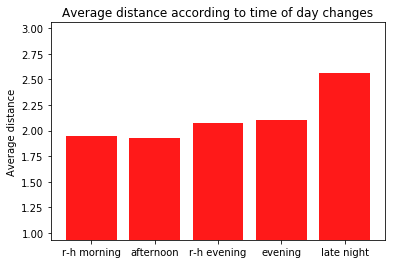

In [38]:
boolean = data["time_of_day"] == "rush_hour_morning" #Finding time of day's average distance
newdat = data[boolean]
meanrushmor = newdat["distance"].mean()
boolean2 = data["time_of_day"] == "afternoon"
newdat2 = data[boolean2]
meanafter = newdat2["distance"].mean()
boolean3 = data["time_of_day"] == "rush_hour_evening"
newdat3 = data[boolean3]
meanrusheve = newdat3["distance"].mean()
boolean4 = data["time_of_day"] == "evening"
newdat4 = data[boolean4]
meaneve = newdat4["distance"].mean()
boolean5 = data["time_of_day"] == "late_night"
newdat5 = data[boolean5]
meanlate = newdat5["distance"].mean()

cc = ('r-h morning', 'afternoon', 'r-h evening', 'evening', 'late night')
means = [meanrushmor,meanafter,meanrusheve,meaneve,meanlate] #Plot graph these average distance with respect to time of a day
y_pos = np.arange(len(cc))
   
mp.bar(y_pos, means, align='center', alpha=0.9, color = "red")
mp.xticks(y_pos, cc)
mp.ylim(min(means)-1 , max(means)+ 0.5)
mp.ylabel("Average distance")
mp.title("Average distance according to time of day changes")
mp.show()

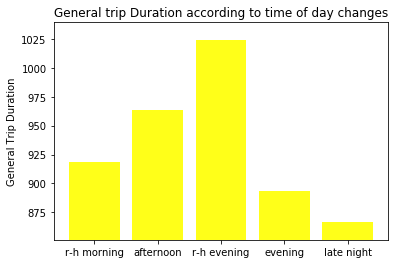

In [39]:
booleandur = data["time_of_day"] == "rush_hour_morning" # same thing for Trip duration respect to Time of day
newdatdur = data[booleandur]
meanrushmordur = newdatdur["trip_duration"].mean()
boolean2dur = data["time_of_day"] == "afternoon"
newdat2dur = data[boolean2dur]
meanafterdur = newdat2dur["trip_duration"].mean()
boolean3dur = data["time_of_day"] == "rush_hour_evening"
newdat3dur = data[boolean3dur]
meanrushevedur = newdat3dur["trip_duration"].mean()
boolean4dur = data["time_of_day"] == "evening"
newdat4dur = data[boolean4dur]
meanevedur = newdat4dur["trip_duration"].mean()
boolean5dur = data["time_of_day"] == "late_night"
newdat5dur = data[boolean5]
meanlatedur = newdat5dur["trip_duration"].mean()

cc = ('r-h morning', 'afternoon', 'r-h evening', 'evening', 'late night')
meansdur = [meanrushmordur,meanafterdur,meanrushevedur,meanevedur,meanlatedur]
y_pos = np.arange(len(cc))
   
mp.bar(y_pos, meansdur, align='center', alpha=0.9,color = "yellow")
mp.xticks(y_pos, cc)
mp.ylim(min(meansdur)-15 , max(meansdur)+ 15)
mp.ylabel("General Trip Duration")
mp.title("General trip Duration according to time of day changes")
mp.show()

In [40]:
import scipy.stats as stats #Hyphotesis test  Does passenger group size aﬀect the distance?
df = pd.DataFrame(data)
ofist = df[["distance"]][df["passenger_count"] < 2]
vall = df[["distance"]][df["passenger_count"] > 1]                              

stats.ttest_ind(ofist , vall)

Ttest_indResult(statistic=array([-4.95908744]), pvalue=array([7.0923006e-07]))

In [42]:
#Hyphotesis test  Do trip distances increase in weekends
import datetime
usemedeleteme = list()
for each in data["pickup_datetime"]:
    strpickdate = str(each)
    myyear = int(strpickdate[0:4])
    mymonth = int(strpickdate[5:7])
    myday = int(strpickdate[8:10])
    if(datetime.date(myyear, mymonth, myday).weekday() < 5):
        usemedeleteme.append("Notweekend")
    else:
        usemedeleteme.append("Weekend")
    
    
data["Weekend_or_not"] = usemedeleteme

df = pd.DataFrame(data)
       
ofist = df[["distance"]][df["Weekend_or_not"] == "Notweekend"]
vall = df[["distance"]][df["Weekend_or_not"] == "Weekend"]   
#del data["Weekend_or_not"]
stats.ttest_ind(ofist , vall)

Ttest_indResult(statistic=array([-5.60648536]), pvalue=array([2.06935508e-08]))

In [43]:
data #final data view only dont make sense

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup distric,dropoff distric,distance,time_of_day,Weekend_or_not
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.931139,rush_hour_evening,Notweekend
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.182147,evening,Notweekend
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.927234,rush_hour_morning,Notweekend
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.225473,afternoon,Notweekend
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.564023,afternoon,Notweekend
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.485830,evening,Weekend
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.645357,evening,Notweekend
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.453228,afternoon,Notweekend
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.374282,evening,Notweekend
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,1.805032,late_night,Notweekend
